In [1]:
from google.colab import files
uploaded = files.upload()

Saving laptop_price - dataset.csv to laptop_price - dataset.csv


In [2]:
import pandas as pd

df = pd.read_csv("laptop_price - dataset.csv")
df.head()


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [3]:
y = df["Price (Euro)"]

In [4]:
X = df[[
    "Company", "TypeName", "Inches", "ScreenResolution",
    "CPU_Company", "CPU_Type", "CPU_Frequency (GHz)",
    "RAM (GB)", "Memory", "GPU_Company", "GPU_Type", "OpSys"
]]


In [5]:
numeric_features = ["Inches", "CPU_Frequency (GHz)", "RAM (GB)"]

In [6]:
categorical_features = [
    "Company", "TypeName", "ScreenResolution",
    "CPU_Company", "CPU_Type", "Memory",
    "GPU_Company", "GPU_Type", "OpSys"
]

In [11]:
X = pd.get_dummies(X)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
predictions = model.predict(X_test)

print(predictions[:10])

[ 558.78902769  654.25046442 1492.81896402  734.52196029 1602.79544872
  645.84677477 1263.32854897  469.64347886 2506.55604098  690.62667374]


In [17]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

print("MAE:", mean_absolute_error(y_test, predictions))

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)

print("R2 Score:", r2_score(y_test, predictions))


MAE: 215.74510211869358
RMSE: 301.50687899728734
R2 Score: 0.8168462527477701


In [20]:
import pandas as pd

new_laptop = pd.DataFrame([{
    "Company": "Dell",
    "TypeName": "Ultrabook",
    "Inches": 15.6,
    "ScreenResolution": "1920x1080",
    "CPU_Company": "Intel",
    "CPU_Type": "Core i5",
    "CPU_Frequency (GHz)": 2.5,
    "RAM (GB)": 8,
    "Memory": "512GB SSD",
    "GPU_Company": "Intel",
    "GPU_Type": "HD Graphics 620",
    "OpSys": "Windows 10"
}])

# Convert categorical → numeric
new_laptop = pd.get_dummies(new_laptop)

# Fix missing columns
missing_cols = set(X.columns) - set(new_laptop.columns)
missing_df = pd.DataFrame(0, index=new_laptop.index, columns=list(missing_cols))

# Merge cleanly
new_laptop = pd.concat([new_laptop, missing_df], axis=1)

# Ensure correct column order
new_laptop = new_laptop[X.columns]

# Predict
predicted = model.predict(new_laptop)
print("Predicted Price (Euro):", predicted[0])


Predicted Price (Euro): 1688.9155584862738


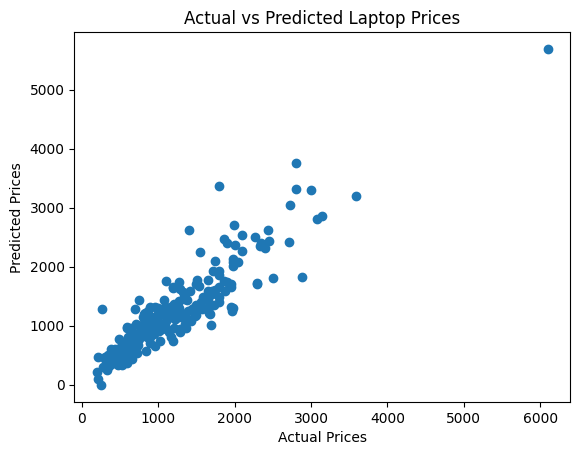

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Laptop Prices")
plt.show()


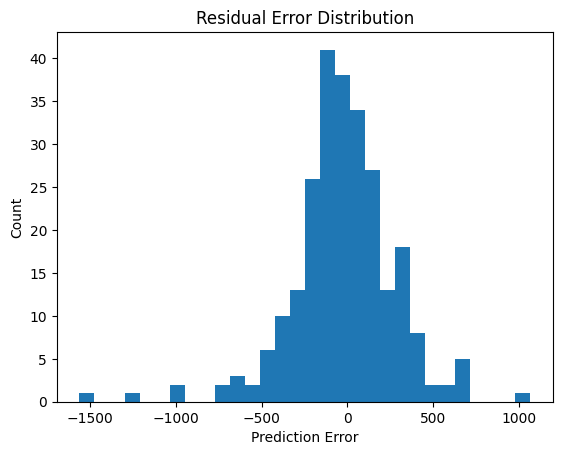

In [22]:
errors = y_test - predictions

plt.hist(errors, bins=30)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Residual Error Distribution")
plt.show()


In [23]:
import pickle

with open("laptop_price_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully!")

Model saved successfully!
